In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

# Loading and showing datasets


In [39]:
# Update the path below to point to your local CSV file
df1 = pd.read_csv('project1.csv')
df1.head()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [40]:
# Update the path below to point to your local CSV file
df2 = pd.read_csv('project2.csv')
df2.head()

,name,ratings,price,imgURL,storage_ram,os_processor,camera,display,network,battery
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,"9,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,"10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,"10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,"10,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM4 GBExpandable Storag...,Operating SystemAndroid 12Processor TypeExynos...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type4G, 3G, 2GSupported Networks4G LTE...",Battery Capacity6000 mAhDual BatteryNo
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,"15,499",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBTotal Memory128 G...,Operating SystemAndroid 12Processor TypeQualco...,Primary Camera AvailableYesPrimary Camera50MP ...,Display Size16.76 cm (6.6 inch)Resolution2408 ...,"Network Type5G, 4G, 3G, 2GSupported Networks5G...",Battery Capacity5000 mAh


# Imputing missing values

In [41]:
df1.isnull().mean()*100

name               0.0
ratings            0.0
price              0.0
imgURL             0.0
camera             0.0
display            0.0
battery            0.0
storage            0.0
ram                0.0
processor          0.0
android_version    0.0
dtype: float64

In [42]:
df2.isnull().mean()*100

name            0.000000
ratings         3.993056
price           0.000000
imgURL          0.000000
storage_ram     1.041667
os_processor    3.645833
camera          2.430556
display         0.520833
network         1.909722
battery         0.520833
dtype: float64

In [43]:
df1['processor'] = df1['processor'].str.replace('not mentioned', '')

df1.head()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [44]:
df1.isnull()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
402,False,False,False,False,False,False,False,False,False,False,False
403,False,False,False,False,False,False,False,False,False,False,False
404,False,False,False,False,False,False,False,False,False,False,False
405,False,False,False,False,False,False,False,False,False,False,False


In [45]:
# Data cleaning for the new dataset

# Remove the currency symbol from the price and convert it to an integer
df2['price'] = df2['price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(int)

# Split the 'storage_ram' field into 'internal_storage', 'ram', and 'expandable_storage'
df2['internal_storage'] = df2['storage_ram'].str.extract(r'Internal Storage(\d+) GB', expand=False).astype(float)
df2['ram'] = df2['storage_ram'].str.extract(r'RAM(\d+) GB', expand=False).astype(float)
df2['expandable_storage'] = df2['storage_ram'].str.extract(r'Expandable Storage(\d+) GB', expand=False).astype(float)

# Split the 'os_processor' field into 'os' and 'processor_type'
df2['os'] = df2['os_processor'].str.extract(r'Operating System(.+?)Processor', expand=False).str.strip()
df2['processor_type'] = df2['os_processor'].str.extract(r'Processor Type(.+)', expand=False).str.strip()

# Split the 'camera' field into 'primary_camera', 'secondary_camera', and 'flash_type'
df2['primary_camera'] = df2['camera'].str.extract(r'Primary Camera(\d+)MP', expand=False).astype(float)
df2['secondary_camera'] = df2['camera'].str.extract(r'Secondary Camera(\d+)MP', expand=False).astype(float)
# Fixed: lazy .+? with no boundary only captures 1 char. Now captures until next keyword or end.
df2['flash_type'] = df2['camera'].str.extract(r'Flash(.+?)(?:Primary|Secondary|Video|$)', expand=False).str.strip()

# Split the 'display' field into 'display_size', 'resolution', 'display_type'
df2['display_size'] = df2['display'].str.extract(r'Display Size(.+?) cm', expand=False).str.replace('(', '', regex=False).astype(float)
df2['resolution'] = df2['display'].str.extract(r'Resolution(.+?)Pixels', expand=False).str.strip()
# Fixed: lazy .+? with no boundary only captures 1 char. Now captures full display type.
df2['display_type'] = df2['display'].str.extract(r'Display Type(.+?)(?:GPU|Other|Touch|$)', expand=False).str.strip()

# Split the 'network' field into 'network_type' and 'supported_networks'
df2['network_type'] = df2['network'].str.extract(r'Network Type(.+?)Supported', expand=False).str.strip()
df2['supported_networks'] = df2['network'].str.extract(r'Supported Networks(.+)', expand=False).str.strip()

# Fill missing values in 'battery_capacity' with -1 before converting to integer
df2['battery_capacity'] = df2['battery'].str.extract(r'Battery Capacity(\d+) mAh', expand=False).fillna(-1).astype(int)

df2.head()

# Drop the original columns
df2.drop(['storage_ram', 'os_processor', 'camera', 'display', 'network', 'battery'], axis=1, inplace=True)

df2.head()

,name,ratings,price,imgURL,internal_storage,ram,expandable_storage,os,processor_type,primary_camera,secondary_camera,flash_type,display_size,resolution,display_type,network_type,supported_networks,battery_capacity
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,64.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,Rear FlashHD RecordingYesFull HD RecordingYes,16.76,2408 x 1080,Full HD+HD Game SupportYesDisplay Colors16M,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,Rear FlashHD RecordingYesFull HD RecordingYes,16.76,2408 x 1080,Full HD+HD Game SupportYesDisplay Colors16M,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,Rear FlashHD RecordingYesFull HD RecordingYes,16.76,2408 x 1080,Full HD+HD Game SupportYesDisplay Colors16M,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,NaN,Android 12,Exynos 850Processor CoreOcta CorePrimary Clock...,50.0,8.0,Rear FlashHD RecordingYesFull HD RecordingYes,16.76,2408 x 1080,Full HD+HD Game SupportYesDisplay Colors16M,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,6.0,NaN,Android 12,Qualcomm Snapdragon 750GProcessor CoreOcta Cor...,50.0,8.0,YesHD RecordingYes,16.76,2408 x 1080,Full HD+,"5G, 4G, 3G, 2G","5G, 4G LTE, WCDMA, GSMInternet Connectivity5G,...",5000


In [46]:
df2.isnull()

,name,ratings,price,imgURL,internal_storage,ram,expandable_storage,os,processor_type,primary_camera,secondary_camera,flash_type,display_size,resolution,display_type,network_type,supported_networks,battery_capacity
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
572,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
573,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
574,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [47]:
df2.isnull().mean()*100


name                   0.000000
ratings                3.993056
price                  0.000000
imgURL                 0.000000
internal_storage       6.770833
ram                    6.944444
expandable_storage    78.819444
os                     5.902778
processor_type        28.125000
primary_camera         6.250000
secondary_camera      26.041667
flash_type            31.423611
display_size           0.520833
resolution            38.194444
display_type          26.909722
network_type           1.909722
supported_networks     1.909722
battery_capacity       0.000000
dtype: float64

In [48]:
df2.drop(['expandable_storage', 'processor_type', 'secondary_camera', 'flash_type', 'resolution', 'display_type'], axis=1, inplace=True)
df2.head()

,name,ratings,price,imgURL,internal_storage,ram,os,primary_camera,display_size,network_type,supported_networks,battery_capacity
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,64.0,4.0,Android 12,50.0,16.76,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,Android 12,50.0,16.76,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,Android 12,50.0,16.76,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,4.0,Android 12,50.0,16.76,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",6000
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,128.0,6.0,Android 12,50.0,16.76,"5G, 4G, 3G, 2G","5G, 4G LTE, WCDMA, GSMInternet Connectivity5G,...",5000


In [49]:
df2.isnull().mean()*100

name                  0.000000
ratings               3.993056
price                 0.000000
imgURL                0.000000
internal_storage      6.770833
ram                   6.944444
os                    5.902778
primary_camera        6.250000
display_size          0.520833
network_type          1.909722
supported_networks    1.909722
battery_capacity      0.000000
dtype: float64

In [50]:
# Fixed: Use .loc[] instead of chained indexing to avoid SettingWithCopyWarning
# Fixed: Added random_state for reproducibility

np.random.seed(42)

mask = df2['network_type'].isnull()
df2.loc[mask, 'network_type'] = df2['network_type'].dropna().sample(mask.sum(), random_state=42).values

mask = df2['supported_networks'].isnull()
df2.loc[mask, 'supported_networks'] = df2['supported_networks'].dropna().sample(mask.sum(), random_state=42).values

mask = df2['ratings'].isnull()
df2.loc[mask, 'ratings'] = df2['ratings'].dropna().sample(mask.sum(), random_state=42).values

mask = df2['os'].isnull()
df2.loc[mask, 'os'] = df2['os'].dropna().sample(mask.sum(), random_state=42).values

In [51]:
df2.isnull().mean()*100

name                  0.000000
ratings               0.000000
price                 0.000000
imgURL                0.000000
internal_storage      6.770833
ram                   6.944444
os                    0.000000
primary_camera        6.250000
display_size          0.520833
network_type          0.000000
supported_networks    0.000000
battery_capacity      0.000000
dtype: float64

In [52]:
X = df2[['ratings', 'price', 'internal_storage', 'ram', 'primary_camera', 'display_size', 'battery_capacity']]
X.head()

,ratings,price,internal_storage,ram,primary_camera,display_size,battery_capacity
0,4.3,9499,64.0,4.0,50.0,16.76,6000
1,4.3,10499,128.0,4.0,50.0,16.76,6000
2,4.3,10499,128.0,4.0,50.0,16.76,6000
3,4.3,10499,128.0,4.0,50.0,16.76,6000
4,4.3,15499,128.0,6.0,50.0,16.76,5000


In [53]:
knn = KNNImputer(n_neighbors=2)

imputed_data = knn.fit_transform(X)

X2 = pd.DataFrame(imputed_data, columns=X.columns)

In [54]:
X2.isnull().mean()*100

ratings             0.0
price               0.0
internal_storage    0.0
ram                 0.0
primary_camera      0.0
display_size        0.0
battery_capacity    0.0
dtype: float64

In [55]:
X1 = df2[['name', 'imgURL', 'os', 'network_type', 'supported_networks']]
df3 = pd.concat([X1, X2], axis = 1)
df3

,name,imgURL,os,network_type,supported_networks,ratings,price,internal_storage,ram,primary_camera,display_size,battery_capacity
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,9499.0,64.0,4.0,50.0,16.76,6000.0
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"5G, 4G, 3G, 2G","5G, 4G LTE, WCDMA, GSMInternet Connectivity5G,...",4.3,15499.0,128.0,6.0,50.0,16.76,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",https://rukminim2.flixcart.com/image/312/312/k...,Android Pie 9.0,"3G, 4G, 2G","GSM, WCDMA, 4G LTEInternet Connectivity4G, Wi-...",4.3,16199.0,64.0,4.0,25.0,16.26,4000.0
572,"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",https://rukminim2.flixcart.com/image/312/312/j...,Android Oreo 8.1,"3G, 4G, 2G","GSM, WCDMA, 4G LTEInternet Connectivity4G, 3G,...",4.4,9000.0,32.0,2.0,13.0,15.24,3300.0
573,"SAMSUNG Galaxy A71 (Prism Crush Black, 128 GB)",https://rukminim2.flixcart.com/image/312/312/k...,Android 10,"4G VOLTE, 4G, 3G, 2G","4G VoLTE, 4G LTE, WCDMA, GSMGPRSYesPre-install...",4.2,34999.0,128.0,8.0,64.0,17.02,4500.0
574,"SAMSUNG Galaxy M01s (Gray, 32 GB)",https://rukminim2.flixcart.com/image/312/312/k...,Android Pie 9,"4G VOLTE, 3G","4G VoLTE, GSMInternet Connectivity2G GSM, 3G W...",4.2,10999.0,32.0,3.0,13.0,15.75,4000.0


In [56]:
df3.isnull().mean()*100

name                  0.0
imgURL                0.0
os                    0.0
network_type          0.0
supported_networks    0.0
ratings               0.0
price                 0.0
internal_storage      0.0
ram                   0.0
primary_camera        0.0
display_size          0.0
battery_capacity      0.0
dtype: float64

# Plotting density graphs

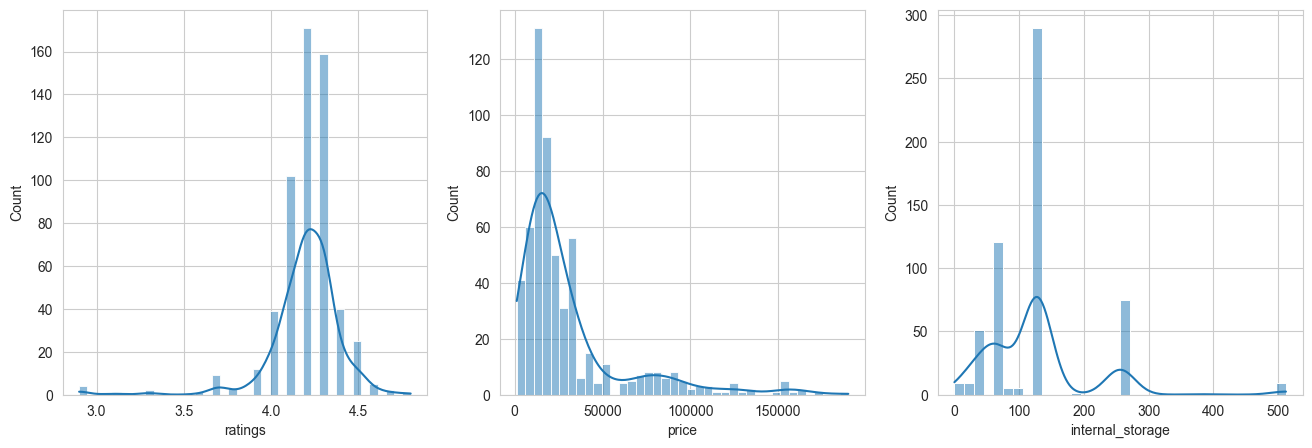

In [57]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.histplot(df3['ratings'], kde=True)

plt.subplot(1,3,2)
sns.histplot(df3['price'], kde=True)

plt.subplot(1,3,3)
sns.histplot(df3['internal_storage'], kde=True)

plt.show()

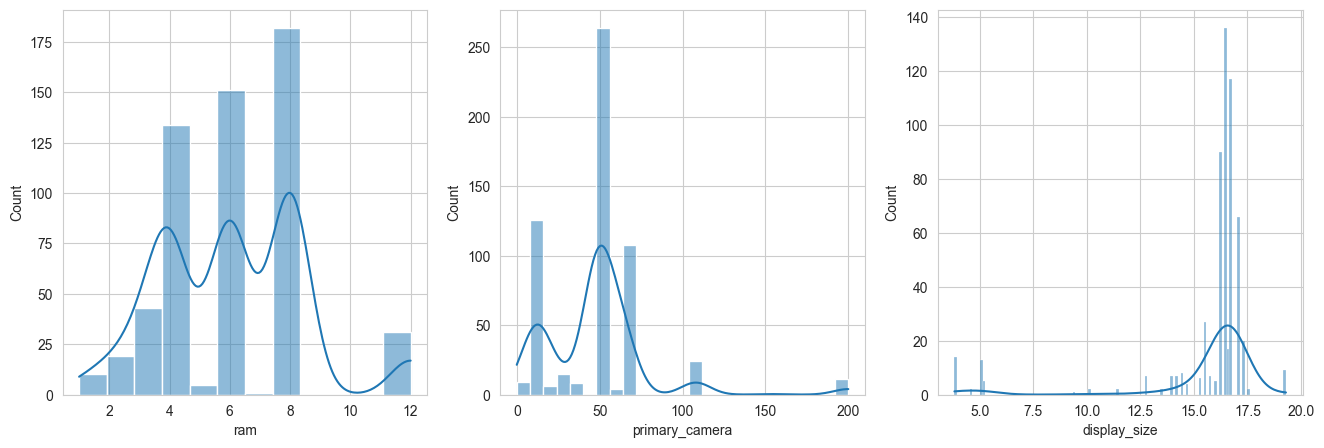

In [58]:
plt.figure(figsize=(16,5))

plt.subplot(1,3,1)
sns.histplot(df3['ram'], kde=True)

plt.subplot(1,3,2)
sns.histplot(df3['primary_camera'], kde=True)

plt.subplot(1,3,3)
sns.histplot(df3['display_size'], kde=True)

plt.show()

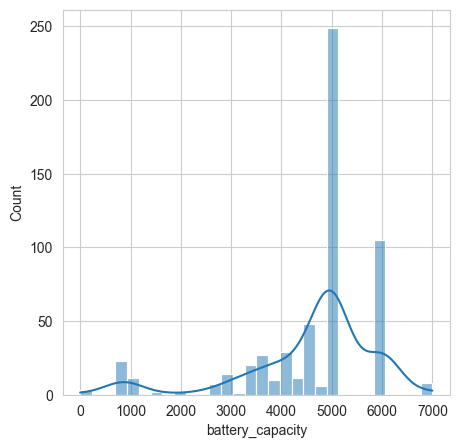

In [59]:
plt.figure(figsize=(5,5))
sns.histplot(df3['battery_capacity'], kde=True)
plt.show()

# One hot encoding

In [60]:
df3['network_type'].value_counts()

network_type
5G, 4G, 3G, 2G              135
4G, 3G, 2G                  128
5G                           57
4G VOLTE                     40
3G, 4G, 2G                   35
4G VOLTE, 4G, 3G, 2G         33
4G                           25
2G                           24
2G, 3G, 4G, 5G               20
4G VOLTE, 3G                 18
2G, 3G, 4G VOLTE, 5G         13
3G, 4G VOLTE, 4G, 2G         11
5G, 4G VOLTE                  7
3G, 4G VOLTE, 2G              7
2G, 3G, 4G                    6
5G, 4G VOLTE, 4G, 3G, 2G      4
3G                            3
3G, 4G                        2
4G, 4G VOLTE, 3G              2
4G VOLTE, 3G, 4G, 2G          2
3G, 2G                        2
5G, 4G                        1
5G, 4G VOLTE, 3G              1
Name: count, dtype: int64

In [61]:
counts = df3['network_type'].value_counts()
df3['network_type'].nunique()
threshold = 100
repl = counts[counts <= threshold].index
# Fixed: Added .astype(int) so one-hot columns are int instead of bool
Y = pd.get_dummies(df3['network_type'].replace(repl, 'uncommon'), drop_first=True).astype(int)
Y.head()

,"5G, 4G, 3G, 2G",uncommon
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


In [62]:
counts = df3['os'].value_counts()
df3['os'].nunique()
threshold = 50
repl = counts[counts <= threshold].index
# Fixed: Added .astype(int) so one-hot columns are int instead of bool
Z = pd.get_dummies(df3['os'].replace(repl, 'others'), drop_first=True).astype(int)
Z.head()

,Android 11,Android 12,Android 13,others
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [63]:
D = pd.concat([Y,Z], axis = 1)
D.head()

,"5G, 4G, 3G, 2G",uncommon,Android 11,Android 12,Android 13,others
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,1,0,0,1,0,0


In [64]:
df4 = pd.concat([df3,D], axis = 1)
df4.head()

,name,imgURL,os,network_type,supported_networks,ratings,price,internal_storage,ram,primary_camera,display_size,battery_capacity,"5G, 4G, 3G, 2G",uncommon,Android 11,Android 12,Android 13,others
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,9499.0,64.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"4G, 3G, 2G","4G LTE, WCDMA, GSMInternet Connectivity4G, 3G,...",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",https://rukminim2.flixcart.com/image/312/312/x...,Android 12,"5G, 4G, 3G, 2G","5G, 4G LTE, WCDMA, GSMInternet Connectivity5G,...",4.3,15499.0,128.0,6.0,50.0,16.76,5000.0,1,0,0,1,0,0


In [65]:
df4.drop(['imgURL','os','network_type','supported_networks',],axis=1,inplace=True)
df4.head()


,name,ratings,price,internal_storage,ram,primary_camera,display_size,battery_capacity,"5G, 4G, 3G, 2G",uncommon,Android 11,Android 12,Android 13,others
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499.0,64.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499.0,128.0,6.0,50.0,16.76,5000.0,1,0,0,1,0,0


In [66]:
# Average rating and price for each smartphone model
average_rating_price = df4.groupby('name')[['ratings', 'price']].mean()

average_rating_price.head()

,ratings,price
name,,
"OPPO Reno10 5G (Ice Blue, 256 GB)",4.2500,32999.0
"OPPO Reno10 5G (Silvery Grey, 256 GB)",4.2125,32999.0
SAMSUNG 1215,4.2000,2099.0
"SAMSUNG A04 E (Copper, 128 GB)",4.1000,11499.0
"SAMSUNG A04 e (Copper, 64 GB)",4.1000,9999.0


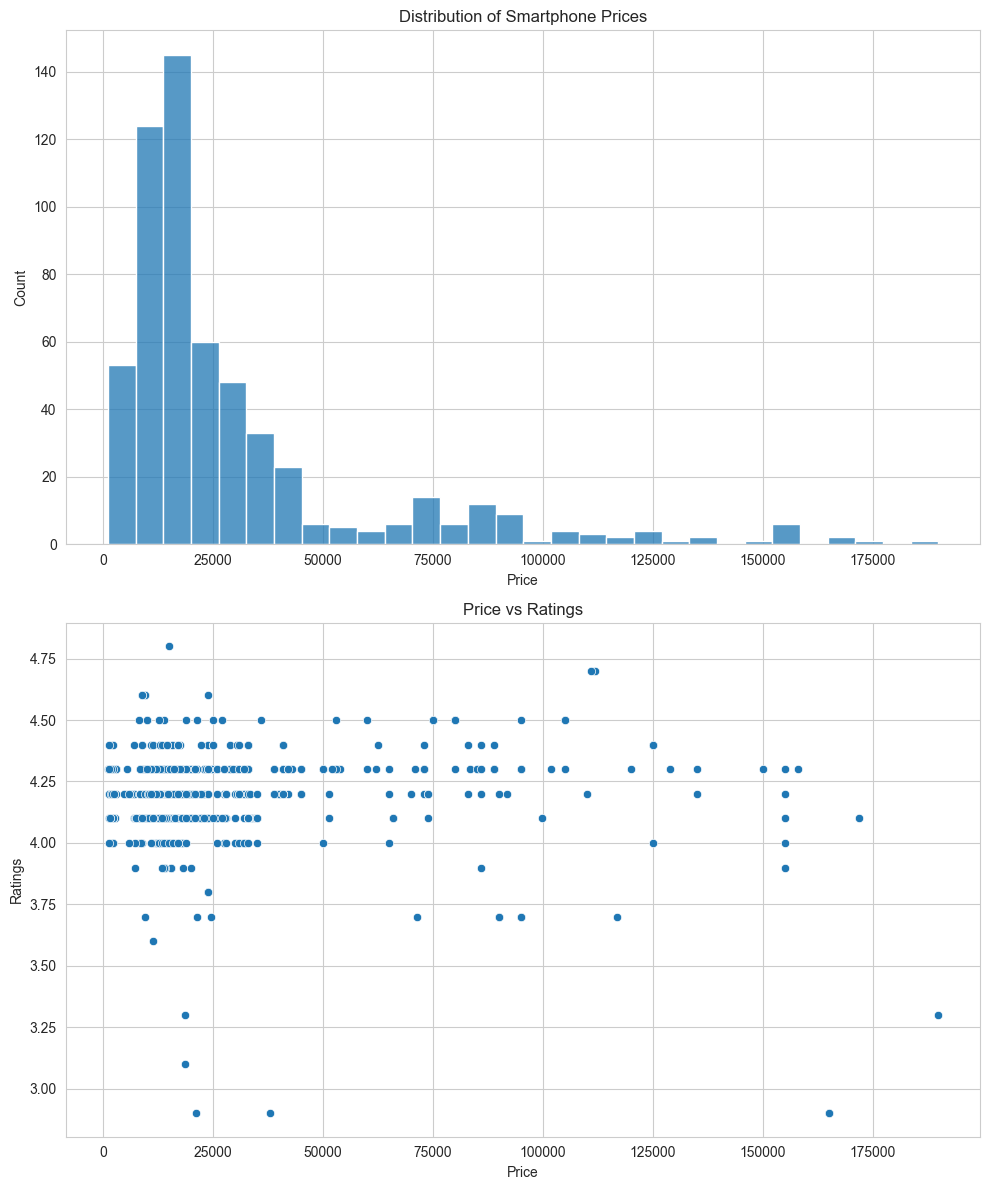

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style('whitegrid')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Histogram of prices
sns.histplot(df4['price'], bins=30, ax=ax1)
ax1.set_title('Distribution of Smartphone Prices')
ax1.set_xlabel('Price')
ax1.set_ylabel('Count')

# Scatter plot of prices and ratings
sns.scatterplot(data=df4, x='price', y='ratings', ax=ax2)
ax2.set_title('Price vs Ratings')
ax2.set_xlabel('Price')
ax2.set_ylabel('Ratings')

# Display the plots
plt.tight_layout()
plt.show()

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Select numeric features
features = ['ratings', 'price', 'internal_storage', 'ram', 'primary_camera', 'display_size', 'battery_capacity','5G, 4G, 3G, 2G','uncommon','Android 11','Android 12','Android 13','others']
data_subset = df4[features]

# Standardize the features
scaler = StandardScaler()
data_subset_scaled = scaler.fit_transform(data_subset)
similarity_matrix = cosine_similarity(data_subset_scaled[:])
similarity_matrix

array([[ 1.        ,  0.96390997,  0.96390997, ..., -0.27470631,
        -0.06086312, -0.49165813],
       [ 0.96390997,  1.        ,  1.        , ..., -0.2781623 ,
        -0.17195849, -0.49950741],
       [ 0.96390997,  1.        ,  1.        , ..., -0.2781623 ,
        -0.17195849, -0.49950741],
       ...,
       [-0.27470631, -0.2781623 , -0.2781623 , ...,  1.        ,
        -0.15153816,  0.33097985],
       [-0.06086312, -0.17195849, -0.17195849, ..., -0.15153816,
         1.        ,  0.22912442],
       [-0.49165813, -0.49950741, -0.49950741, ...,  0.33097985,
         0.22912442,  1.        ]])

c:\Users\amish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\amish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\amish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\amish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

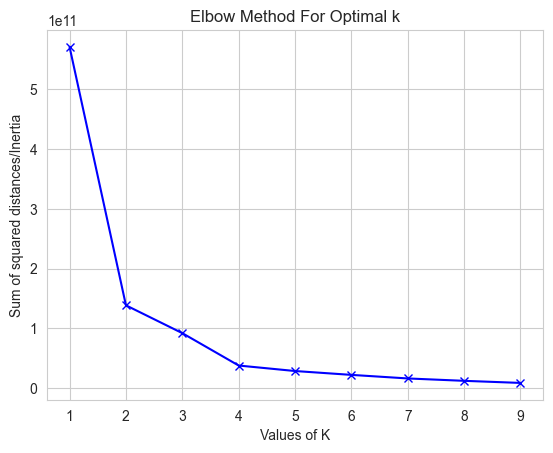

In [69]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_subset)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [70]:
data_subset.head()

,ratings,price,internal_storage,ram,primary_camera,display_size,battery_capacity,"5G, 4G, 3G, 2G",uncommon,Android 11,Android 12,Android 13,others
0,4.3,9499.0,64.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
1,4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
2,4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
3,4.3,10499.0,128.0,4.0,50.0,16.76,6000.0,0,0,0,1,0,0
4,4.3,15499.0,128.0,6.0,50.0,16.76,5000.0,1,0,0,1,0,0


In [71]:
# The elbow method graph suggests K=3 as the optimal number of clusters
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df4[features])
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)
# Add the cluster labels to the original DataFrame
df4['cluster'] = kmeans.labels_
# Print the number of phones in each cluster
print(df4['cluster'].value_counts())

cluster
1    276
2    202
0     98
Name: count, dtype: int64


c:\Users\amish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


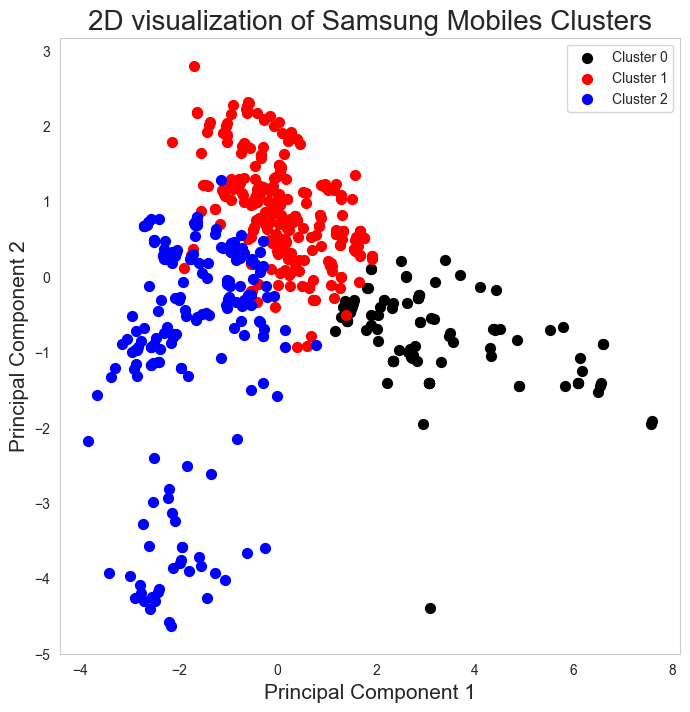

In [72]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_data = pca.fit_transform(data_scaled)

# Create a DataFrame with the two principal components
principal_df = pd.DataFrame(data=principal_data, columns=['principal component 1', 'principal component 2'])

# Concatenate the clusters labels to the DataFrame
final_df = pd.concat([principal_df, df4[['cluster']]], axis=1)

# Plot the clusters
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2D visualization of Samsung Mobiles Clusters', fontsize=20)

colors = ['black', 'red', 'blue']
for cluster in range(3):
    indicesToKeep = final_df['cluster'] == cluster
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1'], final_df.loc[indicesToKeep, 'principal component 2'], c=colors[cluster], s=50)

ax.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
ax.grid()

# Summary of clusters 

In [73]:
cluster_characteristics = df4.groupby('cluster')[features].mean()
print(cluster_characteristics)

          ratings         price  internal_storage       ram  primary_camera  \
cluster                                                                       
0        4.207143  82379.102041        257.959184  9.265306       73.081633   
1        4.181159  20552.021739        107.478261  5.608696       46.721014   
2        4.217327  17072.178218         84.257426  5.086634       36.207921   

         display_size  battery_capacity  5G, 4G, 3G, 2G  uncommon  Android 11  \
cluster                                                                         
0           16.892347       4467.336735        0.765306  0.204082    0.071429   
1           16.548261       5168.478261        0.202899  0.427536    0.326087   
2           13.866064       3858.158416        0.019802  0.866337    0.034653   

         Android 12  Android 13    others  
cluster                                    
0          0.326531    0.469388  0.051020  
1          0.362319    0.130435  0.018116  
2          0.049505   

In [74]:
# Fixed: Added numeric_only=True to exclude non-numeric columns like 'name'
df4.corr(numeric_only=True)['price']
df4.rename(columns = {'5G, 4G, 3G, 2G':'Network'}, inplace=True)

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score
from sklearn.preprocessing import OneHotEncoder

# Select relevant columns for model training
selected_columns = ['internal_storage', 'ram', 'primary_camera', 'display_size', 'cluster', 'Network', 'Android 13', 'price']
data_selected = df4[selected_columns]

# Drop rows with missing target values (price) if any
data_selected = data_selected.dropna(subset=['price'])

# Separate features (X) and target (y)
X = data_selected.drop(columns=['price'])
y = data_selected['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize all the models
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=0),
    RandomForestRegressor(n_estimators=100, random_state=0),
    SVR(),
    GradientBoostingRegressor(random_state=0)
]

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, predictions)
    R2score = r2_score(y_test, predictions)
    # Fixed: Use dynamic sample size instead of hardcoded 116
    n = len(X_test)
    p = X_test.shape[1]
    Adjustedr2score = 1 - ((1 - R2score) * (n - 1) / (n - p - 1))
    print(f"{model_name} R2 Score: {R2score}")
    print(f"{model_name} Adjusted R2 Score: {Adjustedr2score}")
    print(f"{model_name} MAE: {mae}")
    print('---------------------------------------------------------------')

LinearRegression R2 Score: 0.6516730915520845
LinearRegression Adjusted R2 Score: 0.629096347486016
LinearRegression MAE: 12428.534951087886
---------------------------------------------------------------
DecisionTreeRegressor R2 Score: 0.8449377754982248
DecisionTreeRegressor Adjusted R2 Score: 0.834887446132369
DecisionTreeRegressor MAE: 5221.261124794746
---------------------------------------------------------------
RandomForestRegressor R2 Score: 0.8774926240895483
RandomForestRegressor Adjusted R2 Score: 0.8695523312064635
RandomForestRegressor MAE: 4939.125051866167
---------------------------------------------------------------
SVR R2 Score: -0.05586769414123238
SVR Adjusted R2 Score: -0.12430356320594194
SVR MAE: 15626.056751297188
---------------------------------------------------------------
GradientBoostingRegressor R2 Score: 0.8908990781524935
GradientBoostingRegressor Adjusted R2 Score: 0.8838277221068218
GradientBoostingRegressor MAE: 5623.892657681149
-----------------

In [76]:
scolumns=['internal_storage', 'ram', 'primary_camera', 'display_size','cluster','Network','Android 13', 'price']
important_features_data = df4[scolumns]

# Step 2: Prepare the data for modeling
X = important_features_data[['internal_storage', 'ram', 'primary_camera', 'display_size','cluster','Network','Android 13']]
y = important_features_data['price']

# Step 3: Train the GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
# Assuming you have already split the data into training and testing sets, and X_train, y_train are the training data.
# You can also use the entire dataset for training if you prefer.
model = DecisionTreeRegressor()
model.fit(X, y)

# Step 4: Get the feature importances
feature_importances = model.feature_importances_

# Step 5: Sort and display the important features
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

            Feature  Importance
4           cluster    0.591019
1               ram    0.207029
2    primary_camera    0.082595
3      display_size    0.073207
6        Android 13    0.021103
5           Network    0.017222
0  internal_storage    0.007825


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Use the last model from the training loop (GradientBoostingRegressor)
best_model = models[-1]  # GradientBoostingRegressor

def predict_price(internal_storage, ram, primary_camera, display_size, cluster, network, android):
    
    input_data = pd.DataFrame({
        'internal_storage': [internal_storage],
        'ram': [ram],
        'primary_camera': [primary_camera],
        'display_size': [display_size],
        'cluster': [cluster],
        'Network': [network],
        'Android 13': [android]
    })

    input_data_filled = input_data.fillna(input_data.mean())

    price_prediction = best_model.predict(input_data_filled)[0]

    return price_prediction

ram_input = widgets.IntSlider(description='RAM (GB):', min=0, max=16, step=2, value=4)
display_input = widgets.FloatSlider(description='Display(in):', min=3.0, max=16, step=0.1, value=6.2)
primary_camera_input = widgets.IntSlider(description='Primary Camera(MP):', min=10, max=150, step=1, value=12)

cluster_options = [('Flagship/High End', 0), ('Budget End', 1), ('Low End', 2)]
cluster_input = widgets.Dropdown(description='Budget', options=cluster_options, value=0)

internal_storage_input = widgets.IntSlider(description='Internal Storage(GB):', min=16, max=512, step=8, value=128)
android_input = widgets.IntSlider(description='Android Version:', min=10, max=15, step=1, value=13)

network_option = [('5G/4G', 0), ('4G', 1), ('3G', 2)]
network_input = widgets.Dropdown(description='Connectivity:', options=network_option, value=0)

predict_button = widgets.Button(description='Predict Price')
output = widgets.Output()

def on_predict_button_click(button):
    output.clear_output()
    
    ram = ram_input.value
    display_size = display_input.value
    primary_cam = primary_camera_input.value
    cluster = cluster_input.value
    internal_storage = internal_storage_input.value
    android = android_input.value
    network = network_input.value
        
    price_prediction = predict_price(internal_storage, ram, primary_cam, display_size, cluster, network, android)

    with output:
        print(f"Predicted Price: ₹ {price_prediction:.2f}")

predict_button.on_click(on_predict_button_click)

display(ram_input, display_input, primary_camera_input, cluster_input, internal_storage_input, network_input, android_input, predict_button, output)

IntSlider(value=4, description='RAM (GB):', max=16, step=2)

FloatSlider(value=6.2, description='Display(in):', max=16.0, min=3.0)

IntSlider(value=12, description='Primary Camera(MP):', max=150, min=10)

Dropdown(description='Budget', options=(('Flagship/High End', 0), ('Budget End', 1), ('Low End', 2)), value=0)

IntSlider(value=128, description='Internal Storage(GB):', max=512, min=16, step=8)

Dropdown(description='Connectivity:', options=(('5G/4G', 0), ('4G', 1), ('3G', 2)), value=0)

IntSlider(value=13, description='Android Version:', max=15, min=10)

Button(description='Predict Price', style=ButtonStyle())

Output()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, Image
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

def recommendator(prod_name, data, features):
    
    scale = StandardScaler()
    scaled_data = scale.fit_transform(data[features])
    
    df5 = pd.DataFrame(scaled_data, index=data.index, columns=features)
    # Fixed: compute similarity and use the SAME variable (was using global similarity_matrix)
    similarity = cosine_similarity(df5)
    
    product_idx = data.index[data['name'] == prod_name]
    if len(product_idx) == 0:
        print(f"Product '{prod_name}' not found in data.")
        return pd.Series(dtype=float)
    
    product_similarities = pd.Series(similarity[product_idx[0]], index=data['name'])
    top_result = product_similarities.sort_values(ascending=False).head()
    
    top_result = top_result.iloc[1:]  # Exclude the product itself
    return top_result

product_dropdown = widgets.Dropdown(options=df4['name'].unique(), description='Product:', disabled=False)
recommend_button = widgets.Button(description='Recommend')

output = widgets.Output()
display(product_dropdown, recommend_button, output)

def recommend(button):
    output.clear_output()
    product_name = product_dropdown.value

    features = ['internal_storage', 'ram', 'primary_camera', 'display_size', 'battery_capacity']
    recommendations = recommendator(product_name, df4, features)
    
    # Display recommendations
    with output:
        if recommendations.empty:
            print('No recommendations found.')
        else:
            for product in recommendations.index:
                print(f"Product: {product}, Similarity Score: {recommendations[product]:.4f}")

recommend_button.on_click(recommend)

Dropdown(description='Product:', options=('SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)', 'SAMSUNG Galaxy F13 (W…

Button(description='Recommend', style=ButtonStyle())

Output()